In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

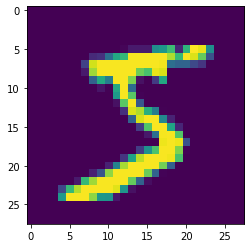

In [5]:
plt.imshow(X_train[0])

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
only_zeros = X_train[y_train==0]

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Reshape, Flatten
from tensorflow.keras.models import Sequential

In [9]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape=[28,28]))
discriminator.add(Dense(150,activation='relu'))
discriminator.add(Dense(100,activation='relu'))
#Final output
discriminator.add(Dense(1, activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy', optimizer='adam')

In [11]:
codings_size = 100

generator = Sequential()
generator.add(Dense(100, activation='relu', input_shape=[codings_size]))
generator.add(Dense(150, activation='relu'))
generator.add(Dense(784, activation='relu'))
generator.add(Reshape([28,28]))

In [12]:
GAN = Sequential([generator, discriminator])

In [13]:
discriminator.trainable = False

In [14]:
GAN.compile(loss='binary_crossentropy', optimizer='adam')

In [15]:
batch_size = 32

In [16]:
#my_data = X_train
my_data = only_zeros

In [17]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [18]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [19]:
dataset = dataset.batch(batch_size,drop_remainder=True).prefetch(1)

In [23]:
epochs = (5)

In [24]:
GAN.layers[0].summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 150)               15150     
_________________________________________________________________
dense_8 (Dense)              (None, 784)               118384    
_________________________________________________________________
reshape_1 (Reshape)          (None, 28, 28)            0         
Total params: 143,634
Trainable params: 143,634
Non-trainable params: 0
_________________________________________________________________


In [25]:
generator, discriminator = GAN.layers

for epoch in range(epochs):
    print(f"Currently on Epoch: {epoch+1}")
    i = 0
    
    for X_batch in dataset:
        i = i + 1
        if i % 100 == 0:
            print(f"\t Currently on batch number {i} of {len(my_data)//batch_size}")
            
        #discriminator training phase
        noise = tf.random.normal(shape=[batch_size, codings_size])
        
        gen_images = generator(noise)
        
        X_fake_vs_real = tf.concat([gen_images, tf.dtypes.cast(X_batch, tf.float32)], axis=0)
        
        y1 = tf.constant([[0.0]] * batch_size + [[1.0]] * batch_size)
        
        discriminator.trainable = True
        
        discriminator.train_on_batch(X_fake_vs_real, y1)
        
        #train generator
        noise = tf.random.normal(shape=[batch_size, codings_size])
        y2 = tf.constant([[1.0]]*batch_size)
        discriminator.trainable = False
        GAN.train_on_batch(noise, y2)

Currently on Epoch: 1
	 Currently on batch number 100 of 185
Currently on Epoch: 2
	 Currently on batch number 100 of 185
Currently on Epoch: 3
	 Currently on batch number 100 of 185
Currently on Epoch: 4
	 Currently on batch number 100 of 185
Currently on Epoch: 5
	 Currently on batch number 100 of 185


In [26]:
noise = tf.random.normal(shape=[10, codings_size])

In [27]:
noise.shape

TensorShape([10, 100])

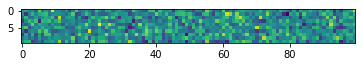

In [28]:
plt.imshow(noise)

In [29]:
images = generator(noise)

In [30]:
images.shape

TensorShape([10, 28, 28])

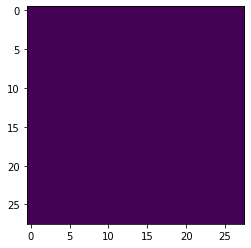

In [33]:
plt.imshow(images[0])

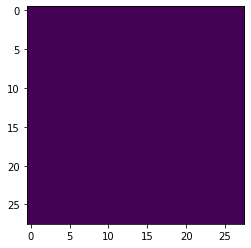

In [34]:
plt.imshow(images[1])